2021.3.19 邵佳琪 


reference：
- 《An_Introduction_to_Statistical_Learning_with_Applications_in_R》
- 《利用python进行数据分析》
- [pandas说明文档](https://www.pypandas.cn/docs/user_guide/io.html#csv-%E6%96%87%E6%9C%AC%E6%96%87%E4%BB%B6)
- [Logistic Regression说明文档]()             

# 4：Classification

What is classification？
qualitative
classiﬁcation：Predicting a qualitative response for an observation can be referred to as classifying that observation, since it involves assigning the observation to a category, or class.
How to classify？
* logistic regression
* linear discriminant analysis 线性判别分析
* K-nearest neighbors.

## 4.1 An Overview of Classiﬁcation：default.csv 信用卡违约数据
- aim：predicting whether an individual will default on his or her credit card payment, on the basis of annual income and monthly credit card balance.
- data set display

In [102]:
#包和数据的载入
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import sklearn.metrics
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix


In [103]:
plt.close('all')
file = pd.read_csv('Default.csv',encoding='unicode_escape')
df = pd.DataFrame(file)
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
5,No,Yes,919.588530,7491.558572
6,No,No,825.513331,24905.226578
7,No,Yes,808.667504,17600.451344
8,No,No,1161.057854,37468.529288
9,No,No,0.000000,29275.268293


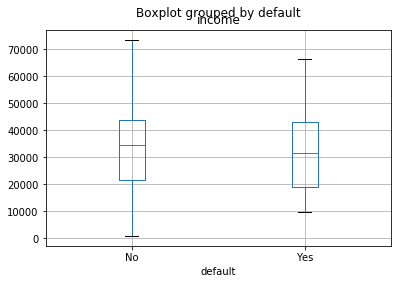

In [104]:
bp2= df.boxplot(by='default',column=['income'])

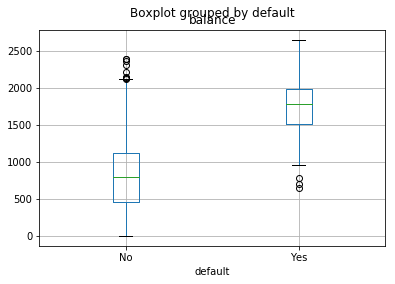

In [162]:
bp2= df.boxplot(by='default',column=['balance'])

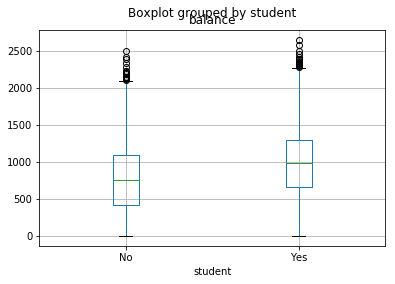

In [168]:
bp3= df.boxplot(by='student',column=['balance'])

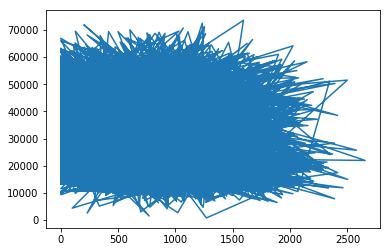

In [167]:
y = df['default'].map({'Yes':0,'No':1})
X = df.loc[:,'balance':'income']
X = sm.add_constant(X)
results = sm.Logit(y,X).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 18 Mar 2021   Pseudo R-squ.:                  0.4594
Time:                        00:09:55   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5405      0.435     26.544      0.000      10.688      12.393
balance       -0.0056      0

# LAB:Logistic Regression

In [84]:
# 1导入股票市场数据,df2：float,df3：string类型
df2 = pd.read_csv('Smarket.csv')
index=df2.columns
df3=pd.read_csv('Smarket.csv', dtype={'code':str})

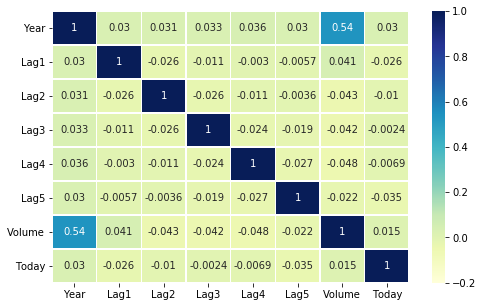

In [85]:
# 2观察相关性
corr = df2.corr()
plt.figure(figsize = (8,5))
sns.heatmap(corr,annot=True,cmap="YlGnBu",vmin=-0.2,linewidths=.5)

In [86]:
df3[].plot.box()

SyntaxError: invalid syntax (<ipython-input-86-c882ecd172a8>, line 1)

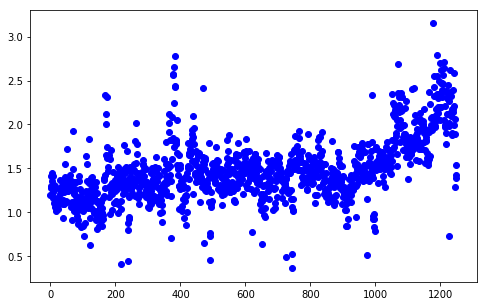

In [87]:
# 3画趋势图 https://github.com/matplotlib/matplotlib/issues/14603/
plt.figure(figsize = (8,5))
plt.scatter(df2.index,df2['Volume'],c="b")

In [88]:
# 4使用映射转化为二值变量
df2_orig = df2.copy()
y = df3['Direction'].map({'Down':0,'Up':1})
X = df2.iloc[:,1:-2]
X = sm.add_constant(X)
results = sm.Logit(y,X).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:                0.002074
Time:                        23:45:13   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

In [89]:
#使用置信区间来计算系数的影响，来更好地估计一个变量影响录取率的不确定性
params = results.params
conf = results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
const,0.550000,1.413171,0.881615
Lag1,0.842484,1.025575,0.929532
Lag2,0.868951,1.057456,0.958581
Lag3,0.916867,1.115121,1.011147
Lag4,0.915222,1.113276,1.009403
Lag5,0.916926,1.113329,1.010366
Volume,0.839507,1.561774,1.145041


In [91]:
# 预测前10位
prob = results.predict(X)[1:11]
predicted_classes = np.where(prob <=0.5,'Down','Up')
pd.DataFrame({'Probabilities':prob,'Classes':predicted_classes})

,Probabilities,Classes
1,0.481468,Down
2,0.481139,Down
3,0.515222,Up
4,0.510781,Up
5,0.506956,Up
6,0.492651,Down
7,0.509229,Up
8,0.517614,Up
9,0.488838,Down
10,0.496521,Down


In [92]:
#confusion matrix
table = results.pred_table(threshold=0.5)
table

array([[145., 457.],
       [141., 507.]])

In [93]:
# the fraction of days for which the prediction was correct:
(145+507)/1250


0.5216

## train & test

In [120]:
# 选取test/train,Shape of train is (998, 9),Shape of test is  (252, 9)
del df2['Direction']
df2 = pd.concat([df2, y], axis=1)
train = df2[df2['Year']<2005]
test = df2[df2['Year'] >= 2005]
X_train = train.iloc[:,1:-2]
X_train = sm.add_constant(X_train)
X_test = test.iloc[:,1:-2]
X_test = sm.add_constant(X_test)
y_train = train['Direction']
y_test = test['Direction']

In [121]:
# 如果多attach了请删除
# del df2['Direction']
df2

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,1
5,2001,0.213,0.614,-0.623,1.032,0.959,1.34910,1.392,1
6,2001,1.392,0.213,0.614,-0.623,1.032,1.44500,-0.403,0
7,2001,-0.403,1.392,0.213,0.614,-0.623,1.40780,0.027,1
8,2001,0.027,-0.403,1.392,0.213,0.614,1.16400,1.303,1
9,2001,1.303,0.027,-0.403,1.392,0.213,1.23260,0.287,1


In [96]:
results2 = sm.Logit(y_train,X_train).fit()
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:                0.001562
Time:                        23:45:29   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
                                        LLR p-value:                    0.9044
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.

In [122]:
pred_test = results2.predict(X_test)

In [123]:
results2 = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


### Performance on test set
| PRED\TRUE | Down | UP  |
|-----------|------|-----|
| DOWN      | 77  | 97  |
| UP        | 34  | 44|
accuracy=0.4802

⚠️The results are rather disappointing: the test error rate is 52%, which is worse than random guessing!

In [124]:
pred_classes = np.where(pred_test > 0.5,1,0)
cm = confusion_matrix(y_test,pred_classes)
print("",pd.DataFrame(cm,columns = ['DOWN','UP'],index = ['DOWN','UP']))
print("accuracy=",accuracy2)

       DOWN  UP
DOWN    77  34
UP      97  44
accuracy= 0.4801587301587302


In [125]:
accuracy2 = accuracy_score(y_test,pred_classes)


### Reﬁt of the logistic regression using just Lag1 and Lag2
| PRED\TRUE | Down | UP  |
|-----------|------|-----|
| DOWN      | 35   | 34  |
| UP        | 35   | 106 |
accuracy=0.5595

In [126]:

predictors = ['Lag1','Lag2']
X_train = train[predictors]
X_train = sm.add_constant(X_train)

X_test = test[predictors]
X_test = sm.add_constant(X_test)
# y_train and y_test remains the same

In [127]:
results3 = sm.Logit(y_train,X_train).fit()
pred_test3 = results3.predict(X_test)

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


In [131]:
pred_classes3 = np.where(pred_test3 > 0.5,1,0)
cm3 = confusion_matrix(y_test,pred_classes3)
accuracy3 = accuracy_score(y_test,pred_classes3)

In [132]:
print("",pd.DataFrame(cm3,columns = ['DOWN','UP'],index = ['DOWN','UP']))
print("accuracy=",accuracy3)


       DOWN   UP
DOWN    35   76
UP      35  106
accuracy= 0.5595238095238095


# LAB2：K-Nearest Neighbors

In [76]:
# neighbor=1,accuracy=0.5
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
pred_test4 = model.predict(X_test)
accuracy_score(y_test,pred_test4)

NameError: name 'accuracy_score' is not defined

In [313]:
# neighbor=3,accuracy=0.5317460317460317
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred_test4 = knn.predict(X_test)
accuracy_score(y_test,pred_test4)

0.5317460317460317

In [349]:
# 交叉验证最合适邻居数量
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
score = cross_val_score(knn,X_test,y_test,scoring='accuracy',cv = 10) #评分标准 分类标准 cv就是分成几份
score.mean()


0.5324444444444444

# LAB3: Caravan Insurance Data


In [139]:
df4 = pd.read_csv('Caravan.csv')
index4=df4.columns
df5=pd.read_csv('Caravan.csv', dtype={'code':str})
#df5

In [140]:
# 简单的数据汇报
del df4['Purchase']
y = df5['Purchase'].map({'No':0,'Yes':1})
df4 = pd.concat([df4, y], axis=1)
df4.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [141]:
# 切分数据集
X_test = df4.iloc[:1000,:]
X_train = df4.iloc[1000:,:]

y_train = X_train['Purchase']
y_test = X_test['Purchase']
del X_train['Purchase']
del X_test['Purchase']

In [142]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test=scaler.fit_transform(X_test)
X_train=scaler.fit_transform(X_train)

In [143]:
X_train

array([[ 1.2308091 , -0.27590228,  2.93614908, ..., -0.15427936,
        -0.08805137, -0.11780156],
       [ 0.13836043, -0.27590228, -2.12438559, ..., -0.15427936,
        -0.08805137, -0.11780156],
       [-1.11015233, -0.27590228,  1.67101541, ..., -0.15427936,
        -0.08805137, -0.11780156],
       ...,
       [ 0.68458477, -0.27590228,  0.40588175, ..., -0.15427936,
        -0.08805137, -0.11780156],
       [ 0.76261681, -0.27590228,  0.40588175, ..., -0.15427936,
        -0.08805137, -0.11780156],
       [ 0.68458477, -0.27590228,  0.40588175, ..., -0.15427936,
        -0.08805137, -0.11780156]])

In [144]:
# KNN, n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [151]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print("KNN, n_neighbors = 1:\n accuracy",accuracy_score(y_test,pred))
print("",pd.DataFrame(cm,columns = ['No','Yes'],index = ['No','Yes']))

KNN, n_neighbors = 1:
 accuracy 0.88
       No  Yes
No   872   69
Yes   51    8


In [152]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print("KNN, n_neighbors = 3:\n accuracy",accuracy_score(y_test,pred))
print("",pd.DataFrame(cm,columns = ['No','Yes'],index = ['No','Yes']))

KNN, n_neighbors = 3:
 accuracy 0.926
       No  Yes
No   921   20
Yes   54    5


In [154]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print("KNN, n_neighbors = 5:\n accuracy",accuracy_score(y_test,pred))
print("",pd.DataFrame(cm,columns = ['No','Yes'],index = ['No','Yes']))

KNN, n_neighbors = 5:
 accuracy 0.937
       No  Yes
No   934    7
Yes   56    3
